<a href="https://colab.research.google.com/github/LimYeongJun/Jump-to-python/blob/master/smiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-11-30 05:14:17--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M   219MB/s    in 0.3s    

2019-11-30 05:14:17 (219 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')


In [0]:
import numpy as np
import pandas as pd
 
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import RDConfig
from rdkit import rdBase
from rdkit.Chem.Draw import IPythonConsole
 
trainsdf = Chem.SDMolSupplier(os.path.join( RDConfig.RDDocsDir, 'Book/data/solubility.train.sdf'))
testsdf = Chem.SDMolSupplier(os.path.join( RDConfig.RDDocsDir, 'Book/data/solubility.test.sdf'))
train_mols = [mol for mol in trainsdf if mol != None]
test_mols = [mol for mol in testsdf if mol != None]
sol_class = {"(A) low":0, "(B) medium":1, "(C) high": 2}


In [0]:
from __future__ import print_function #2.X대 python호환을 위해
from rdkit import Chem

In [0]:
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

SMILES - A Simplified Chemcal Language

## 3. SMILES Sepcification Rules (SMILES 규칙)
- SMILE는 띄어쓰기를 사용하지 않고 원자들을 일렬로 나열하여 표현한다.
- 수소원자는 생략하거나, 포함해도 된다.
- 방향족 물질들은 직관적으로 명시하거나 Kekulé form으로 분류할 수 있다.
- 대표적으로 5가지의 규칙이 있다. ( 원자(atom), 결합(bond), 가지(branch), 고리닫힘(ring closure), 단절(disconnection) ) 
### 2.1 Atoms(원자)

- 수소를 포함하지 않는 단일원자는 [ ]사용
organic subset는 [ ] 없이 쓰이기도 한다.
- 최소 원자가 전자를 갖는다고 인식한다. :: B (3), C (4), N (3,5), O (2), P (3,5), S (2,4,6), 할로겐족(1).
지방족 탄소는 대문자 'C' 로, 방향족 탄소는 'c'로 명시한다.

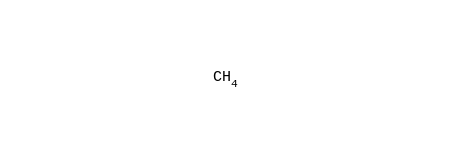

In [36]:
m = Chem.MolFromSmiles('C') # 수소를 생략해도 출력값에 포함된다.
m

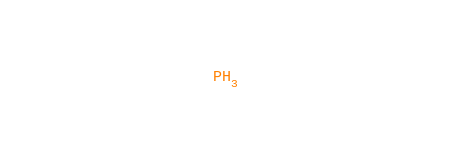

In [38]:
m = Chem.MolFromSmiles('P')
m

- '$[]$'속의 수소와 형식전하는 반드시 명시되어야 한다. - 결합된 수소의 수는 H 와 숫자로 표현된다.
- 형식전하는 + 혹은 - 로 표시되어야 한다. 명시되어 있지 않으면 전하는 0으로 가정한다.
$[Fe+++] = [Fe+3]$

RDKit WARNING: [05:52:22] WARNING: not removing hydrogen atom without neighbors


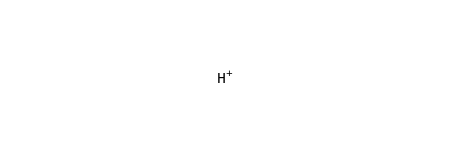

In [43]:
m = Chem.MolFromSmiles('[H+]')
m

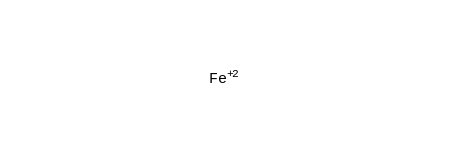

In [46]:
m = Chem.MolFromSmiles('[Fe++]')
m

### 2.2 결합
- 단일결합은 생략해도 상관없고, 이중결합과 삼중결합, 방향족 결합만 표기해준다.

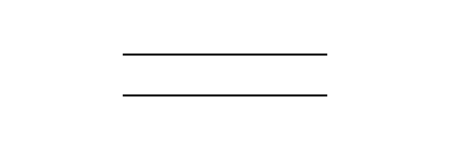

In [68]:
m = Chem.MolFromSmiles('C=C') # 이중결합은 = 을 이용하여 연결해준다.
m

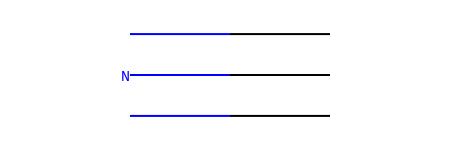

In [69]:
m = Chem.MolFromSmiles('C#N') # 삼중결합은 #을 이용하여 연결해준다.
m

이와 같은 규칙을 이용하여 6-hydroxy-1,4-hexadiene을 표현해보면

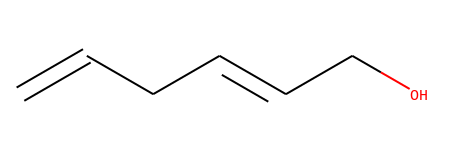

In [73]:
m = Chem.MolFromSmiles('C=CCC=CCO')
m

### 가지(치환기, 알킬기)
- 가지들은 중첩되거나 쌓일 수 있으며, 소괄호`()`로 묶어 **결합 원소의 오른쪽에 써준다.**

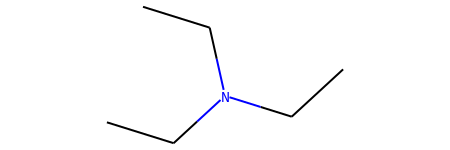

In [74]:
m = Chem.MolFromSmiles('CCN(CC)CC') # Triethylamine
m

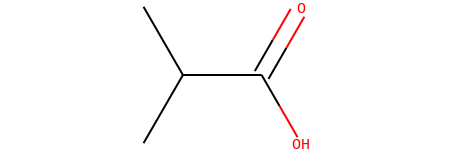

In [76]:
m = Chem.MolFromSmiles('CC(C)C(=O)O') # Isobutyric acid
m

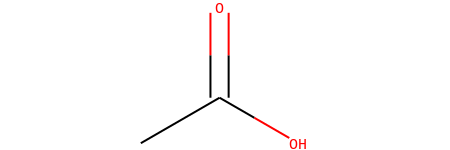

In [78]:
m = Chem.MolFromSmiles('CC(=O)O') # acetic acid
m

### 2.4 고리구조

- 고리형 구조는 고리에서 하나의 결합을 끊어 선형적으로 표시하고, 결합을 끊은 원자 바로 뒤에 숫자를 이용해 고리형 구조를 표현 <br>

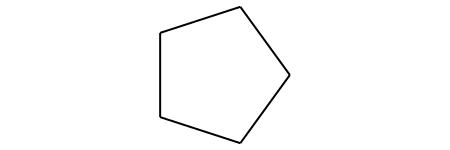

In [80]:
m = Chem.MolFromSmiles('C1CCCC1') # cyclopentane
m

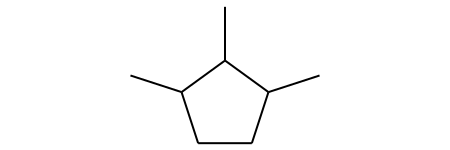

In [104]:
m = Chem.MolFromSmiles('C1C(C)C(C)C(C)C1')
m

- 한 가지의 분자의 다양한 표현은 우선순위가 없다.
- 한 원자는 하나 이상의 `ring closure`을 가질 수 있다. 아래와 같은구조로 설명할 수 있다.

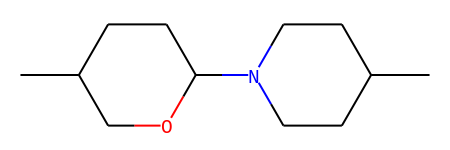

In [93]:
m = Chem.MolFromSmiles('O1CC(C)CCC1N1CCC(C)CC1')
m

### 3.5 연결되지 않은 구조

* disconnected혼합물은 ' . '을 사용하여 각각의 구조들을 분리시킨다.
* 이온 혹은 리간드(ligands)의 연결은 순서에 상관없이 사용가능하다. 한 전하가 다른 전하로의 연결을 의미하는 것도 아니고, 알짜 전하를 반드시 0으로 가질 필요도 없다.
<br><br>
* 필요에 따라, 한 이온의 SMILE이 sodium phenoxide(석탄산나트륨)와 같이 다른 이온에 삽입될 수 있다.



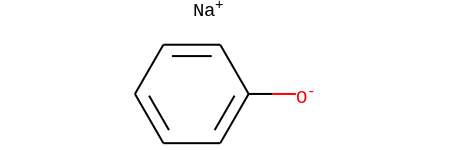

In [105]:
m = Chem.MolFromSmiles('[O-]c1ccccc1.[Na+]')
m

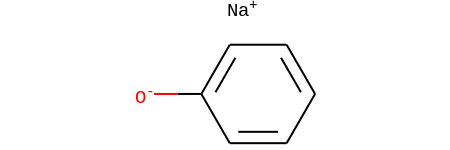

In [102]:
m = Chem.MolFromSmiles('c1cc([O-].[Na+])ccc1')
m

## 이성질체 SMILES

- 동위원소, 이중결합의 구조, 카이랄성을 규정함.
- IUPAC 명명법에서와, CIP에서의 명명법과는 다르게 카이랄성을 명명함.
- 모든 화합물의 카이랄성이 알려져 있지는 않기 때문에, 가능한 카이랄성만을 표기함.


### 3.1 동위원소
- 동위원소는 [원자량 + 원자기호] 로 표기

SMILES | Name
---- | ----
$[12C]$ | carbon-12
$[13C]$ | carbon-13
$[C]$ | carbon(unspecified mass)
$[13CH4]$ | C-13 methane

### 이중결합 배치
* 이중결합의 구조 이성질체는 결합의 방향을 나타내며 '/'와'\'로 명시한다.
* '/'와'\'는 결합된 원자들 간의 상대적인 위치를 나타내는 것으로, 이중결합으로 연결될 때에만 의미를 갖는다.<br>
**cf)E,Z체계**<br>
E(entgegon) : 반대편이라는 어원, 높은 우선순위를 갖는 탄소가 포함된 치환기가 이중결합의 **반대 위치**에 존재할 경우(≒trans-)<br>
Z(zusammen) : 함께라는 어원, 높은 우선순위를 갖는 탄소가 포함된 치환기가 이중결합의 **같은 위치**에 존재할 경우(≒cis-)<br>
Ex) E- and Z-1,2-dibromoethene


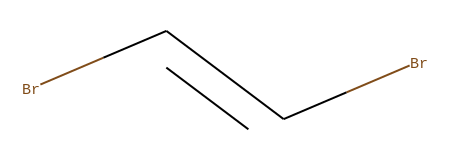

In [109]:
E1 = Chem.MolFromSmiles('Br/C=C/Br') # 이중결합 왼쪽과 오른쪽의 슬래쉬가 방향이 같으면 E 방향이다.
E2 = Chem.MolFromSmiles('Br/C=C\Br') # 이중결합 왼쪽과 오른쪽의 슬래쉬가 방향이 반대면 Z 방향이다.
E1

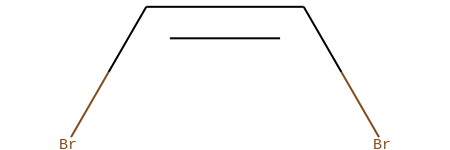

In [110]:
E2

- SMILE과 CIP의 카이랄표현의 중요한 차이점은 SMILE은 국부적인 카이랄성(local chirality)를 표현할 수 있다는 점이다.

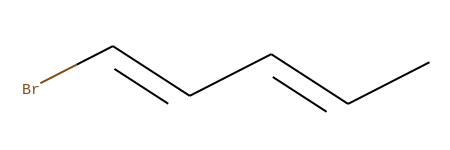

In [111]:
S1 = Chem.MolFromSmiles('Br/C=C/C=C/C')
S2 = Chem.MolFromSmiles('Br/C=C/C=CC')
S1

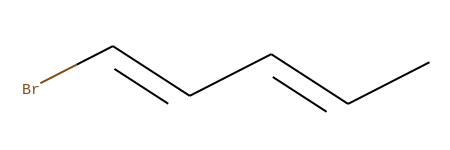

In [113]:
S2

### 3.3 Configuration Around Tetrahedral Centers(사면체의 중심의 구조)
* SMILE은 국부적 카이랄성을 기반으로한 가장 일반적인 형식의 명시법을 사용함.
* SMILE에서 사면체의 중심은 카이랄 원자의 원자 기호에 카이랄이라는 명시(@ 혹은 @@)를 한다.
* cf)**카이랄성(Chirality):**<br>
거울상에 포갤 수 없는 분자를 **카이랄(chiral)**이라 한다.<br>
**같은 분자식이라 하여도 입체구조에 의해 서로 다른 화합물이다. 이를 입체 이성질체라고 한다. **<br>
카이랄성의 가장 일반적인 **원인은 네 개의 서로다른 치환기가 결합된 탄소에서 가장 많이 볼 수 있는 정사면체**인 원자 때문이다.<br>
네 개의 **서로 다른 치환기체가 결합된** 탄소 원자는 두 개의 주요 대칭 요소가 없고 그래서 **카이랄 중심(chiral center)**라 불린다.<br>
Ex) 1-Bromo-1-chloro-1-fluoromethane : C에 -Cl, -H, -F, -Br이 결합된 카이랄 중심이다.
![chiral](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Chiral.svg/300px-Chiral.svg.png)
(사진출처:위키피디아)

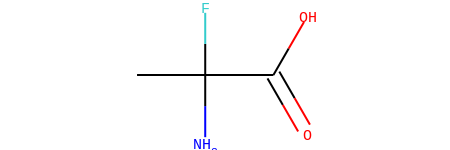

In [116]:
S1 = Chem.MolFromSmiles('NC(C)(F)C(=O)O')
S1

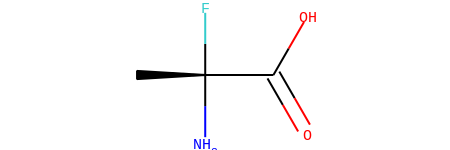

In [122]:
m = Chem.MolFromSmiles('N[C@](C)(F)C(=O)O')
m

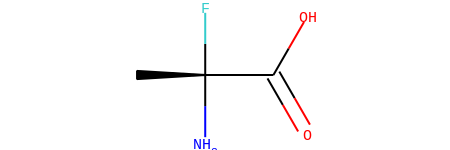

In [126]:
m = Chem.MolFromSmiles('N[C@@](F)(C)C(=O)O')
m

In [127]:
m.HasSubstructMatch(Chem.MolFromSmiles('F[C@](N)(C)C(=O)O'),useChirality=True) # 이 둘의 구조가 같은지 확인

True

### 4.4 일반적인 카이랄 규칙

* 사면체의 구조 등, 많은 종류의 카이랄성이 존재하며, '@'기호를 사용함으로써 카이랄 규격의 문법을 이용하였다.
* SMILE에서 사용하는 일반적 카이랄 규격은'@'기호, 잇따르는 두 글자의 카이랄 표시, 그리고 잇따르는 수적인 카이랄 지정자의 3가지가 있다.
* 가장 기초가 되는 카이랄 class는 각각의 degree(연결의 수); 4개의 연결에 기초가되는 클라스는 사면체(TH)이다.
* 대부분의 경우 @1표시는 SMILE의 순서를 기준으로한 축에 반시계 방향으로 @2표시는 시계방향을 의미한다.
* '@@'와 '@@@'는 '@2'와'@3'으로 해석된다.
* **SMILE은 모든 범위에 관한 카이랄 규격을 다룬다. 따라서 정확하게 알고 있는 모든 것을 보장하는 언어이다.**

* 이 섹션의 마지막 부분에선 사면체, 알렌식(allen-like), 사각평면, trigonal-bypyramidal, octahedral의 카이랄성에 제한될 것이다. 비록 많은 카이랄성은 위의 체계로 다룰 수 있겠지만, 이러한 5개의 클래스는 화학에서 매우 흔하고, 자주 다뤄지는 부분이다.

* Tetrahedral:TH라는 기호로 표시되며, 4방위가 붙어있는 카이랄 클래스의 default임

* Allen-like:AL의 기호로 표시되며, 카이랄 중심이 이중결합으로 연결된 2개가 붙어있는 카이랄 클래스의 default이다. 비록 C=C=C의 구조가 가장 흔하나, C=C=C=C=C 구조들도 또한 allen-like이다, 이중결합된 원자가 일렬로 짝수개가 연결된 것.






![AL](http://www.daylight.com/dayhtml/doc/theory/theory18.gif) | ![substituted](http://www.daylight.com/dayhtml/doc/theory/theory19.gif)
---- | ----
OC(Cl)=$[C@]$=C(C)F | OC=$[C@]$=CF
OC(Cl)=$[C@AL1]$=C(C)F | OC($[H]$)=$[C@AL1]$=C($[H]$)F

In [138]:
m = Chem.MolFromSmiles('OC(Cl)=[C@]=C(C)F')
m.HasSubstructMatch(Chem.MolFromSmiles('OC(Cl)=[C@@]=C(F)C'),useChirality=True) # 카이랄성이 일치하는지 확인

True

* 사각평면 : SP 기호로 표시
@SP1,@SP2, @SP3; 4방위가 연결된 카이랄 class의 default는 아니고, 줄이는 표현 또한 없다. 또한 시계와 반시계방향이 없는 점이 특징임

![SP](http://www.daylight.com/dayhtml/doc/theory/theory20.gif) | -
---- | ----
F$[Po@SP1]$(Cl)(Br)I | (SP1 lists in a "U shape")
F$[Po@SP2]$(Br)(Cl)I | (SP2 lists in a "4-shape")
F$[Po@SP3]$(Cl)(I)Br | (SP3 lists in a "Z shape")

* Trigonal-bipyramidal:TB기호로 사용한다. 5개의 방향의 카이랄 class의 default이다.

![TB](http://www.daylight.com/dayhtml/doc/theory/theory21.gif) <br>
S$[As@@]$(F)(Cl)(Br)C=O<br>
O=C$[As@]$(F)(Cl)(Br)S<br>

In [139]:
m = Chem.MolFromSmiles('S[As@@](F)(Cl)(Br)C=O')
m.HasSubstructMatch(Chem.MolFromSmiles('O=C[As@](Cl)(Br)(F)S'),useChirality=True)

True

In [140]:
m.HasSubstructMatch(Chem.MolFromSmiles('O=C[As@](F)(Cl)(Br)S'),useChirality=True)

True

* *Octahedral* : OH기호로 사용. 6개의 방향의 카이랄 class의 default임.
>가능한 값은 @OH1~ @OH2 : @OH1(or @)는 한 개의 축이 다른 것과 연결을 SMILE에 의해 나열될 때, 4개의 중간, 수평적으로 연결된 원자들을 시계방향으로 나열시킨 것.;@OH2(or @@)는 시계방향

![OH](http://www.daylight.com/dayhtml/doc/theory/theory22.gif)<br>
S$[Co@@]$(F)(Cl)(Br)(I)C=O<br>
O=C$[Co@]$(F)(Cl)(Br)(I)S